In [20]:
pip install import-ipynb

Note: you may need to restart the kernel to use updated packages.


In [21]:
"""" Affichage brut des positions et des requêtes clients """

### Bibliothèques ###
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import imp_files as imp

In [22]:
# Listes des noeuds et clients importées des fichiers csv
N = imp.N
R = imp.R

In [26]:
# Création du graphe
G = nx.DiGraph()

for x in N: # ajout des noeuds au graphe
    G.add_node(x[0], pos=(x[1], x[2]))

In [31]:
edge_labels = {}
for y in R: # ajout des arcs au graphe
    edge_labels[(y[1], y[2])] = y[0] # ajout des labels des arcs pour le plot
    G.add_edge(y[1], y[2], weight=y[3])

# Définitions des couleurs, des poids et des labels

edge_colors = range(2, max(R, key=lambda x: x[3])[3])

In [34]:
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

In [43]:
G.edges()

OutEdgeView([('1', '9'), ('1', '7'), ('2', '3'), ('2', '5'), ('3', '2'), ('4', '9'), ('4', '8'), ('5', '7'), ('5', '4'), ('6', '4'), ('6', '10'), ('7', '2'), ('7', '4'), ('8', '1'), ('8', '3'), ('8', '10'), ('9', '6'), ('9', '2'), ('10', '2')])

In [40]:
node_labels = {}
for node in G.nodes():
    node_labels[node] = str(node)

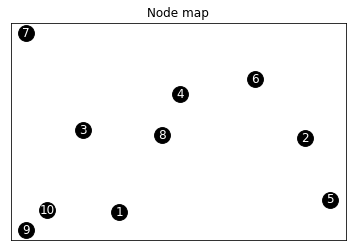

In [63]:
### Affichage du graphe ###

fig, ax = plt.subplots()
ax.set_title('Node map')
pos = nx.get_node_attributes(G, 'pos')

# affichage des noeuds
nodes_draw = nx.draw_networkx_nodes(G,pos, node_size=250, node_color="black")
node_labels_draw = nx.draw_networkx_labels(G, pos, labels = node_labels, font_color="white")

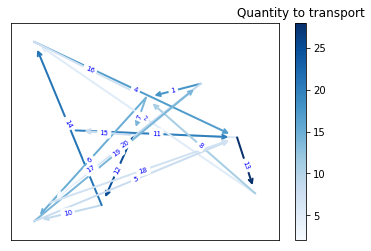

In [64]:
# affichage des arcs
edges_draw = nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=10, edge_color=weights, edge_cmap=plt.cm.Blues, width=2)
edge_labels_draw = nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7, font_color='blue')

# légende de la barre de couleurs
pc = mpl.collections.PatchCollection(edges_draw, cmap=plt.cm.Blues)
pc.set_array(edge_colors)

cb = plt.colorbar(pc)
cb.ax.set_title('Quantity to transport')

ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.axis('on')
plt.show()